In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
a = np.array([[1, 2],
              [3, 4]], np.float32)

print(np.matmul(a, a))
print(np.dot(a, a))

[[  7.  10.]
 [ 15.  22.]]
[[  7.  10.]
 [ 15.  22.]]


In [3]:
a = np.array([[1, 2],
              [3, 4]], np.float32)

a_inv = np.linalg.pinv(a)
print(a_inv)

print(np.matmul(a, a_inv))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[ 1.  0.]
 [ 0.  1.]]


In [4]:
print(np.transpose(a))

[[ 1.  3.]
 [ 2.  4.]]


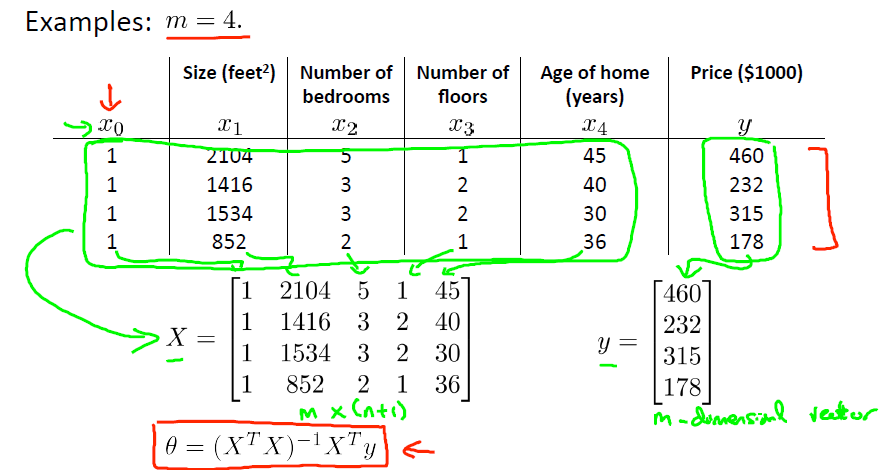

In [5]:
x_train = np.array([[2014, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [1534, 3, 2, 30],
                    [862, 2, 1, 36]], np.float32)
y_train = np.array([[460],
                    [232],
                    [315],
                    [178]], np.float32)

x0 = np.ones([x_train.shape[0], 1])
X = np.hstack((x0, x_train))
XT = np.transpose(X)
XTX = np.matmul(XT, X)
XTX_1 = np.linalg.pinv(XTX)
XTX_1XT = np.matmul(XTX_1, XT)
XTX_1XTy = np.matmul(XTX_1XT, y_train)

print(X)
# print('XT:      ', XT.shape)
# print('XTX:     ', XTX.shape)
# print('XTX_1:   ', XTX_1.shape)
# print('XTX_1XT :', XTX_1XT.shape)
# print('XTX_1XTy:', XTX_1XTy.shape)

[[    1.  2014.     5.     1.    45.]
 [    1.  1416.     3.     2.    40.]
 [    1.  1534.     3.     2.    30.]
 [    1.   862.     2.     1.    36.]]


In [6]:
def normal_equation(x_train, y_train):
    X = np.hstack((np.ones([x_train.shape[0], 1]), x_train))
    XT = np.transpose(X)
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(XT, X)), XT), y_train)

theta = normal_equation(x_train, y_train)
print(XTX_1XTy == theta)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [7]:
train_ratio = 0.8

xy = np.loadtxt('../../dataset/02-stock_google.csv', delimiter=',')
train_size = int((xy.shape[0] - 1) * train_ratio)
x_train, y_train = xy[:train_size], xy[1:train_size+1, [-1]]

In [8]:
theta = normal_equation(x_train, y_train)

print(theta)
print(theta.shape)

[[ 0.956]
 [-0.173]
 [ 0.111]
 [ 0.185]
 [ 0.   ]
 [ 0.877]]
(6, 1)


In [9]:
W = tf.Variable(theta[1:], dtype=tf.float32)
b = tf.Variable(theta[[0]], dtype=tf.float32)

print(W)
print(b)

<tf.Variable 'Variable:0' shape=(5, 1) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(1, 1) dtype=float32_ref>


In [10]:
W = tf.Variable(theta[1:], dtype=tf.float32)
b = tf.Variable(theta[[0]].reshape([1]), dtype=tf.float32)

print(W)
print(b)

<tf.Variable 'Variable_2:0' shape=(5, 1) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>
